In [1]:
import pandas as pd

train_data = pd.read_csv("train_data.csv")
train_data


/var/folders/dm/ffp3qpxs1kx3v192xy1793wh0000gn/T/ipykernel_4091/1560776406.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.780554,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,...,0.819963,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442
2,2,0,0.571150,0.620148,0.624177,0.612275,0.612282,0.999163,0.797654,0.809533,...,0.839128,0.006022,0.625306,0.612271,0.843294,0.278927,0.026816,0.565276,1,0.033034
3,3,0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,...,0.806477,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406
4,4,0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,...,0.799277,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,5802,0,0.507483,0.547263,0.553188,0.596448,0.596448,0.998991,0.797393,0.809318,...,0.800601,0.003993,0.625135,0.596443,0.840625,0.286153,0.028366,0.568173,1,0.018670
5803,5803,0,0.553795,0.636993,0.606671,0.648323,0.648323,0.999388,0.798010,0.809855,...,0.853261,0.000778,0.623890,0.648322,0.843620,0.277068,0.026821,0.565297,1,0.050788
5804,5804,0,0.491639,0.559693,0.541250,0.597003,0.597003,0.998981,0.797405,0.809327,...,0.814292,0.004849,0.623857,0.597002,0.841610,0.280399,0.026902,0.565636,1,0.027161
5805,5805,0,0.513626,0.573321,0.555758,0.646665,0.646665,0.999066,0.797506,0.809396,...,0.815617,0.000476,0.623845,0.646663,0.842716,0.287670,0.026791,0.565159,1,0.017685


### Find features with high correlation that have an absolute value of 0.95 or greater

In [2]:
train_data = train_data.drop('Index', axis = 1)
correlation_matrix = train_data.drop('Bankrupt?', axis = 1).corr()

# Find features with high correlation to others (abs value of 0.95 or greater)
# excluding the 'Bankrupt?' column

high_correlation_features = correlation_matrix.columns[((correlation_matrix.abs() >= 0.95).sum() > 1)]

# Display the features with high correlation
high_correlation_features.tolist()

[' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' Debt ratio %',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Current Liabilities/Liability',
 ' Current Liabilities/Equity',
 ' Working capitcal Turnover Rate',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gr

In [3]:
# Exclude highly correlated features and the target variable 'Bankrupt?' from the dataset
remaining_features = train_data.drop(high_correlation_features.tolist() + ['Bankrupt?'], axis=1).columns.tolist()
print(remaining_features)
print(len(remaining_features))

[' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)', ' Contingent liabilities/Net worth', ' Inventory and accounts receivable/Net value', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency', ' Net Worth Turnover Rate (times)', ' Revenue per person', ' Operating profit per person', ' Allocation rate per pe

### Check Non- Linearity and Normailty

In [4]:
def sort_two_lists_together_using_abs(list1, list2):

  # Create a list of tuples, where each tuple contains the corresponding elements from the two input lists.
    combined_list = list(zip(list1, list2))

  # Sort the combined list by the absolute value of the first element in each tuple.
    sorted_combined_list = sorted(combined_list, key=lambda x: abs(x[0]))
  # Unzip the sorted combined list to get the two sorted lists.
    sorted_list1, sorted_list2 = zip(*sorted_combined_list)

    return sorted_list1, sorted_list2

In [5]:
import numpy as np

from sklearn.linear_model import LinearRegression

# Prepare the target variable
y = train_data['Bankrupt?']

coef_list = []
feature_list = []

for feature in remaining_features:

    X = train_data[[feature]].values
    y = np.linspace(min(X),max(X),len(X))

    linear_reg = LinearRegression()
    linear_reg.fit(X,y)

    coef_list.append(linear_reg.coef_[0][0])
    feature_list.append(feature)

    #print(coef_list)

    if abs(linear_reg.coef_) > 0.2:
        print(feature)
        print("X is linear")


coef_list_abs = [abs(x) for x in coef_list]

 Operating Profit Rate
X is linear
 Non-industry income and expenditure/revenue
X is linear
 Cash flow rate
X is linear
 Continuous Net Profit Growth Rate
X is linear
 Total Asset Return Growth Rate Ratio
X is linear
 Interest Expense Ratio
X is linear
 Revenue per person
X is linear
 Working Capital/Equity
X is linear
 Cash Flow to Equity
X is linear
 Net Income to Stockholder's Equity
X is linear


In [6]:
Z = [x for _,x in sorted(zip(coef_list_abs,feature_list))]
wanted_list = Z[:-15]
print(wanted_list)  
print(len(wanted_list))

[' Net Income Flag', ' Cash Turnover Rate', ' Liability-Assets Flag', ' Total expense/Assets', ' Total Asset Growth Rate', ' Fixed Assets Turnover Frequency', ' Current Asset Turnover Rate', ' Inventory Turnover Rate (times)', ' Cash Flow to Liability', ' Cash Reinvestment %', ' Total Asset Turnover', ' Interest-bearing debt interest rate', ' Current Assets/Total Assets', ' Cash Flow to Total Assets', ' Current Liability to Assets', ' Tax rate (A)', ' Operating Expense Rate', ' Contingent liabilities/Net worth', ' Quick Asset Turnover Rate', ' Cash/Current Liability', ' Quick Assets/Total Assets', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Total debt/Total net worth', ' Research and development expense rate', ' Inventory/Current Liability', ' Cash/Total Assets', ' Accounts Receivable Turnover', ' Quick Ratio', ' Net Worth Turnover Rate (times)', ' Net Value Growth Rate', ' Long-term Liability to Current Assets', ' CFO to Assets', ' Working Capital to Total Assets', ' Reta

In [7]:
columns_to_drop = train_data.columns.difference(wanted_list)
train_data = train_data.drop(columns=columns_to_drop)
train_data

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Cash Reinvestment %,...,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Liability-Assets Flag,Total assets to GNP price,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,8.010000e+09,0.000000e+00,0.000414,0.000000,0.318455,0.029433,0.021975,6.720000e+09,0.000426,0.377035,...,0.457497,0.666103,0.464342,0.570385,0,0.004919,0.026788,0.565144,1,0.032464
1,1.024540e-04,2.720000e+08,0.000140,0.259439,0.324503,0.047159,0.022144,6.770000e+09,0.000504,0.381348,...,0.265440,0.654556,0.461815,0.595348,0,0.005968,0.026801,0.565205,1,0.032442
2,1.059230e-04,4.240000e+09,0.000260,0.104464,0.332708,0.035588,0.022168,9.670000e+09,0.000512,0.387038,...,0.276147,0.691773,0.470120,0.631543,0,0.006022,0.026816,0.565276,1,0.033034
3,7.530000e+09,0.000000e+00,0.000268,0.000000,0.259638,0.043090,0.022159,1.084750e-04,0.000482,0.295965,...,0.057978,0.654096,0.460586,0.404612,0,0.002177,0.027063,0.566190,1,0.015406
4,6.270000e+09,2.360000e+09,0.000409,0.732058,0.319445,0.090340,0.022060,5.590000e+09,0.000425,0.374371,...,0.065429,0.618000,0.454356,0.573564,0,0.001124,0.026880,0.565549,1,0.028858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,2.380000e+09,1.190000e+08,0.000450,0.017917,0.325387,0.081855,0.022036,6.030000e+09,0.000435,0.380258,...,0.600285,0.642195,0.459174,0.596087,0,0.003993,0.028366,0.568173,1,0.018670
5803,4.582670e-04,4.298970e-04,0.000237,0.076222,0.327014,0.012417,0.022084,7.520000e+09,0.000520,0.392608,...,0.403386,0.692402,0.475469,0.630959,0,0.000778,0.026821,0.565297,1,0.050788
5804,4.230000e+09,7.130000e+08,0.000500,0.143942,0.326378,0.168716,0.022047,4.300000e+09,0.000425,0.376989,...,0.046060,0.650947,0.460775,0.604852,0,0.004849,0.026902,0.565636,1,0.027161
5805,7.540660e-04,0.000000e+00,0.000317,0.251645,0.336670,0.048883,0.022134,1.242320e-04,0.000637,0.390531,...,0.026626,0.793044,0.478941,0.629880,0,0.000476,0.026791,0.565159,1,0.017685


In [8]:
train_data

,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Cash Reinvestment %,...,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Liability-Assets Flag,Total assets to GNP price,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,8.010000e+09,0.000000e+00,0.000414,0.000000,0.318455,0.029433,0.021975,6.720000e+09,0.000426,0.377035,...,0.457497,0.666103,0.464342,0.570385,0,0.004919,0.026788,0.565144,1,0.032464
1,1.024540e-04,2.720000e+08,0.000140,0.259439,0.324503,0.047159,0.022144,6.770000e+09,0.000504,0.381348,...,0.265440,0.654556,0.461815,0.595348,0,0.005968,0.026801,0.565205,1,0.032442
2,1.059230e-04,4.240000e+09,0.000260,0.104464,0.332708,0.035588,0.022168,9.670000e+09,0.000512,0.387038,...,0.276147,0.691773,0.470120,0.631543,0,0.006022,0.026816,0.565276,1,0.033034
3,7.530000e+09,0.000000e+00,0.000268,0.000000,0.259638,0.043090,0.022159,1.084750e-04,0.000482,0.295965,...,0.057978,0.654096,0.460586,0.404612,0,0.002177,0.027063,0.566190,1,0.015406
4,6.270000e+09,2.360000e+09,0.000409,0.732058,0.319445,0.090340,0.022060,5.590000e+09,0.000425,0.374371,...,0.065429,0.618000,0.454356,0.573564,0,0.001124,0.026880,0.565549,1,0.028858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,2.380000e+09,1.190000e+08,0.000450,0.017917,0.325387,0.081855,0.022036,6.030000e+09,0.000435,0.380258,...,0.600285,0.642195,0.459174,0.596087,0,0.003993,0.028366,0.568173,1,0.018670
5803,4.582670e-04,4.298970e-04,0.000237,0.076222,0.327014,0.012417,0.022084,7.520000e+09,0.000520,0.392608,...,0.403386,0.692402,0.475469,0.630959,0,0.000778,0.026821,0.565297,1,0.050788
5804,4.230000e+09,7.130000e+08,0.000500,0.143942,0.326378,0.168716,0.022047,4.300000e+09,0.000425,0.376989,...,0.046060,0.650947,0.460775,0.604852,0,0.004849,0.026902,0.565636,1,0.027161
5805,7.540660e-04,0.000000e+00,0.000317,0.251645,0.336670,0.048883,0.022134,1.242320e-04,0.000637,0.390531,...,0.026626,0.793044,0.478941,0.629880,0,0.000476,0.026791,0.565159,1,0.017685


In [9]:
# Before transformation
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy.stats import probplot
from scipy.stats import shapiro

features_to_drop = []

for feature in wanted_list:


    X = train_data[[feature]]
    # Instantiate the QuantileTransformer
    quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=5000, random_state=0)

    # Reshape data for transformation (required for single features)
    data_reshaped = X.values.reshape(-1, 1)

    # Apply the Quantile Transformation
    X_normalized_data = quantile_transformer.fit_transform(data_reshaped).flatten()

    stat1, pvalue1  = shapiro(X_normalized_data)

    if pvalue1 <= 0.05:
        features_to_drop.append(feature)
    else:
        train_data[feature] = X_normalized_data
train_data = train_data.drop(columns=features_to_drop)





/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Library/Frameworks/Python.framework/Versions/3.1

In [10]:
if 'Bankrupt?' in train_data.columns:
    print("true")
print("not in ")

not in 


# PART 2

#### Before clustering, ensure that the target variable is removed since clustering should be unsupervised. Additionally, you should standardize your data because Gaussian Mixture Models (GMMs) assume that each cluster has a Gaussian distribution, which can be affected by the scale of your features.



In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(train_data)
features_scaled

array([[ 1.28779403e+00, -5.73210139e-01, -1.62223698e+00, ...,
         6.12404821e-01, -8.88178420e-16, -7.09654652e-02],
       [-2.27976098e+00,  2.47985493e-01,  5.67825655e-01, ...,
         7.41395369e-01, -8.88178420e-16, -7.18399283e-02],
       [-1.89275072e+00,  1.00615683e+00,  7.92085018e-01, ...,
         7.50894813e-01, -8.88178420e-16, -3.51923952e-02],
       ...,
       [ 6.76670786e-01,  4.45837918e-01, -9.19225561e-01, ...,
         5.99802015e-01, -8.88178420e-16, -4.19163831e-01],
       [ 3.48368100e-01,  1.25317823e+00,  4.50474528e-01, ...,
        -1.28201443e+00, -8.88178420e-16, -1.51193666e+00],
       [ 1.92854674e-01,  5.63512443e-01, -2.29689353e-01, ...,
        -1.23492718e+00, -8.88178420e-16,  1.40460623e+00]])

##### Use Bayesian Information Criterion to determine the number of cluster

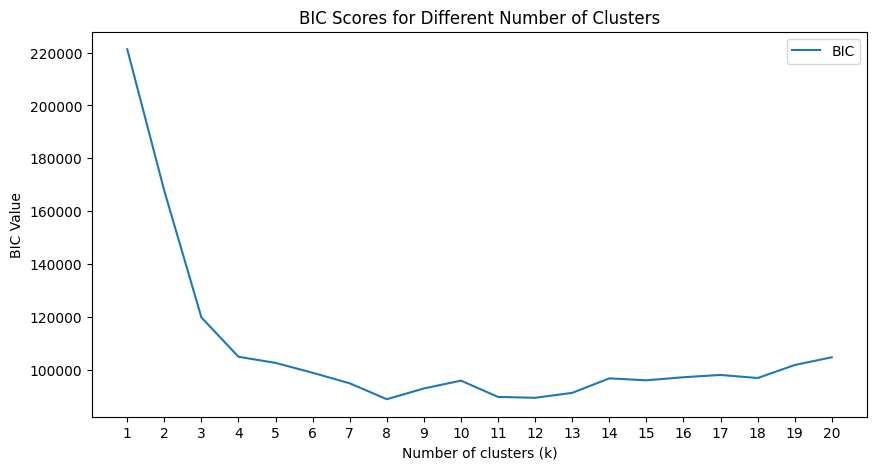

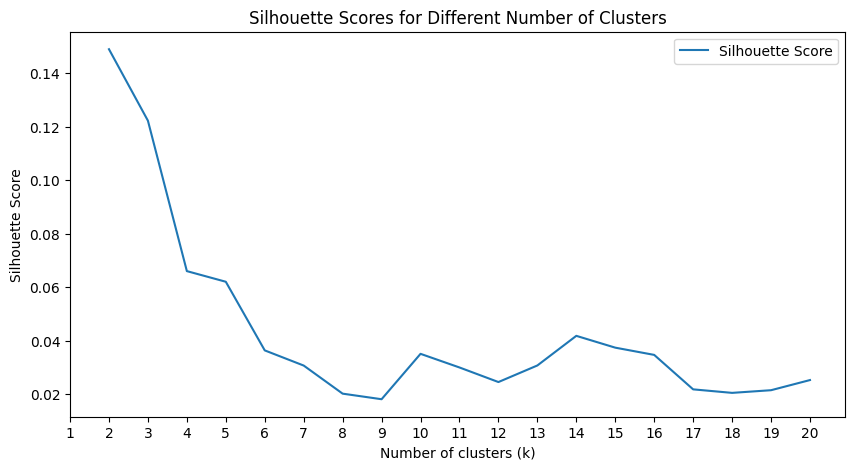

In [12]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score



# Range of possible k values (example: 1 to 20)
k_values = np.arange(1, 21)
bic_values = []
silhouette_scores = []

for k in k_values:
    # Fit GMM
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(features_scaled)
    
    # Calculate BIC
    bic = gmm.bic(features_scaled)
    bic_values.append(bic)
    
    # Calculate Silhouette Score (only if k > 1, as silhouette score requires at least 2 clusters)
    if k > 1:
        labels = gmm.predict(features_scaled)
        silhouette = silhouette_score(features_scaled, labels)
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(np.nan)  # Not applicable for k=1

# Plot BIC scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, bic_values, label='BIC')
plt.xticks(k_values)
plt.legend()
plt.xlabel('Number of clusters (k)')
plt.ylabel('BIC Value')
plt.title('BIC Scores for Different Number of Clusters')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values[1:], silhouette_scores[1:], label='Silhouette Score')  # Start from k=2
plt.xticks(k_values)
plt.legend()
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()




In [13]:
optimal_k = 5

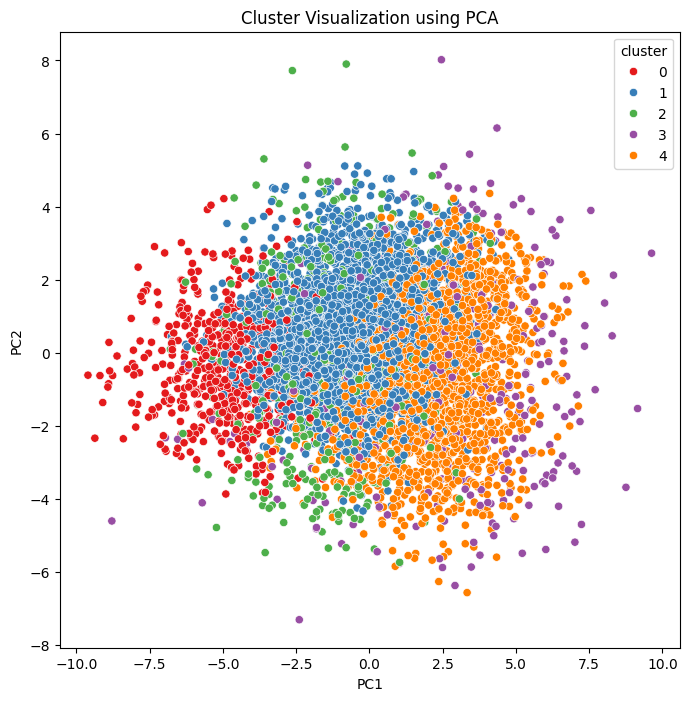

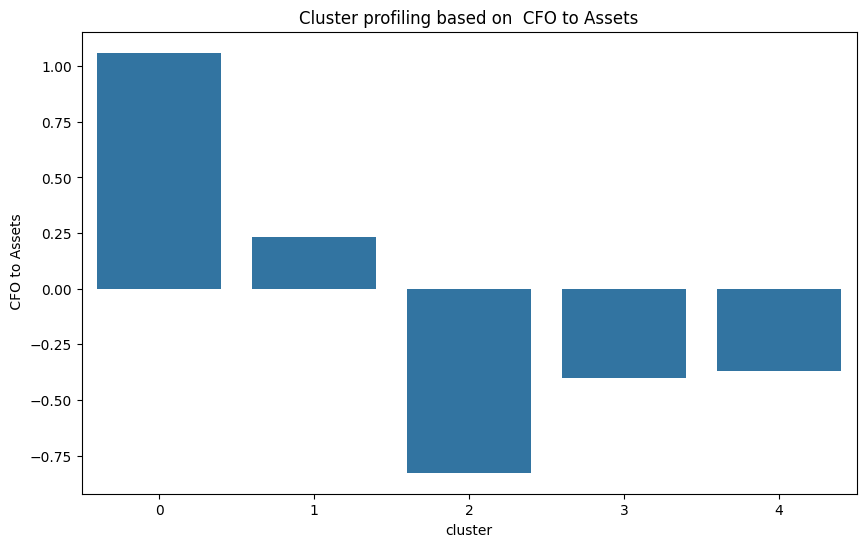

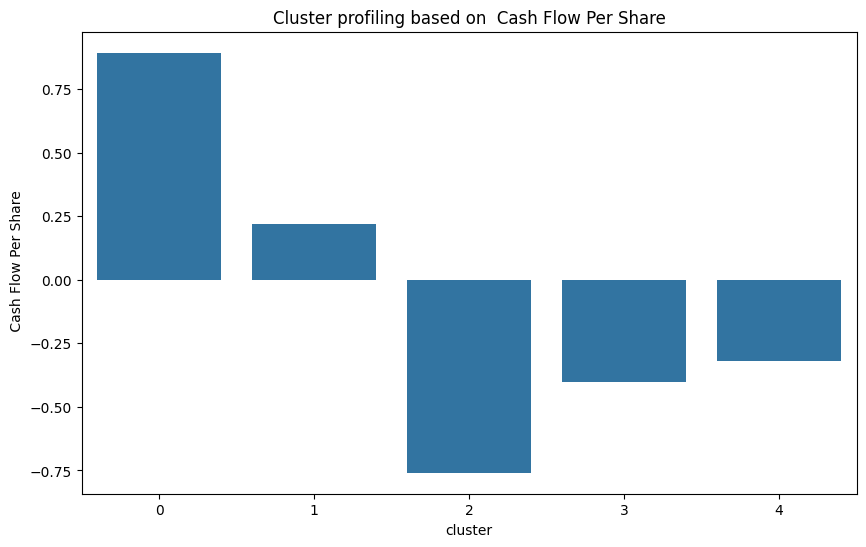

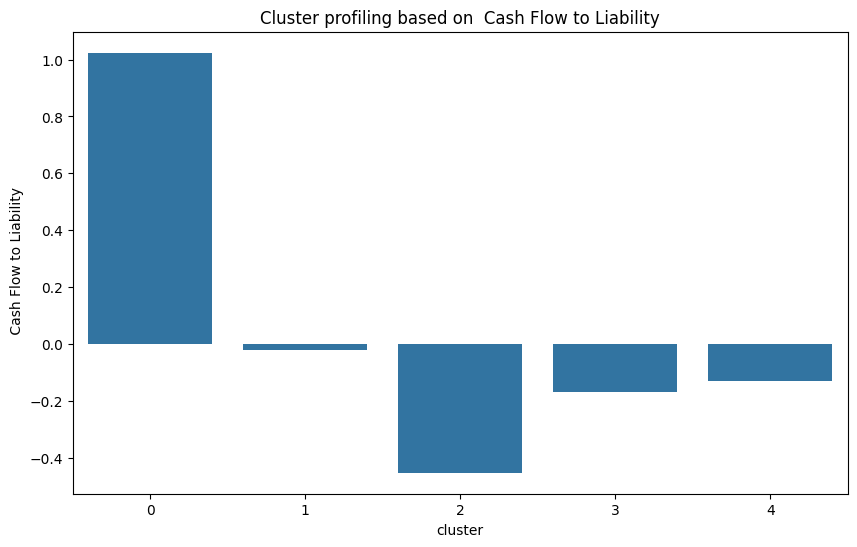

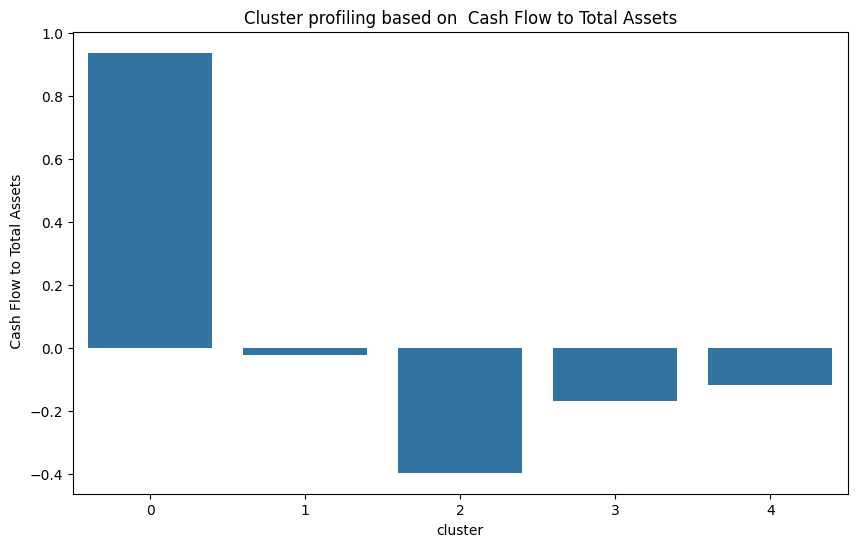

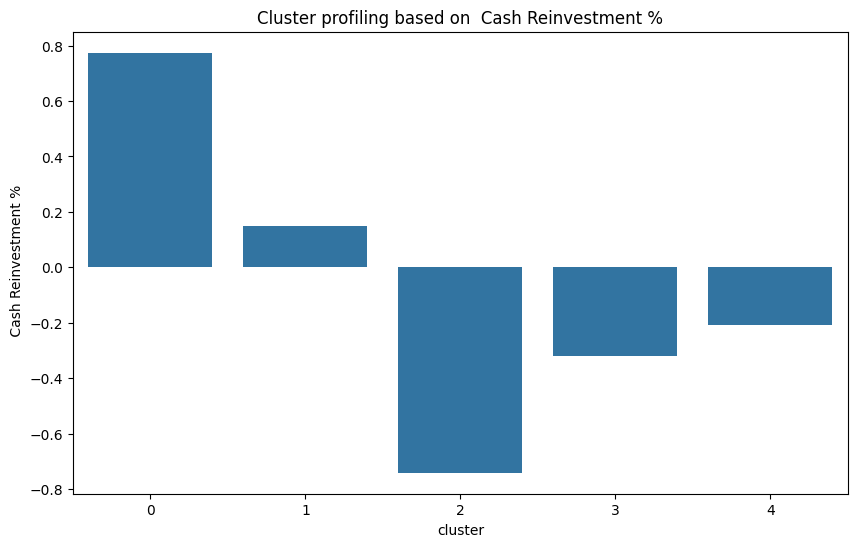

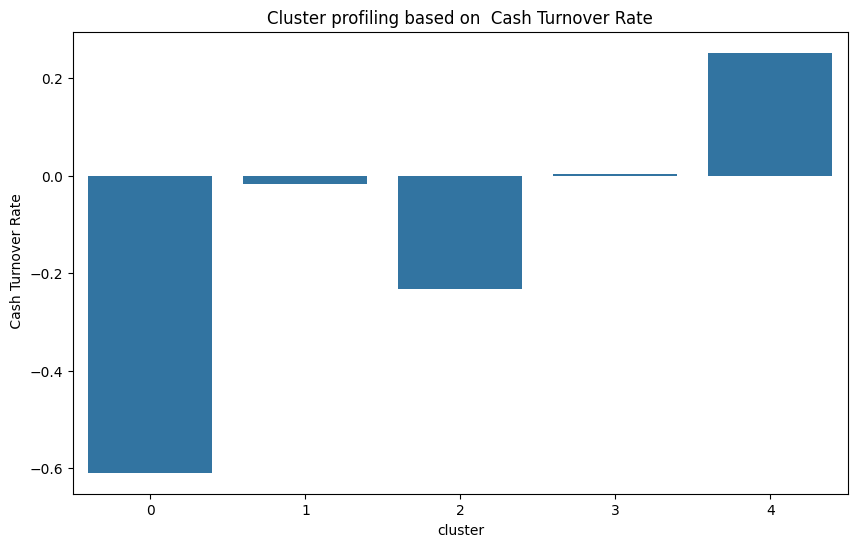

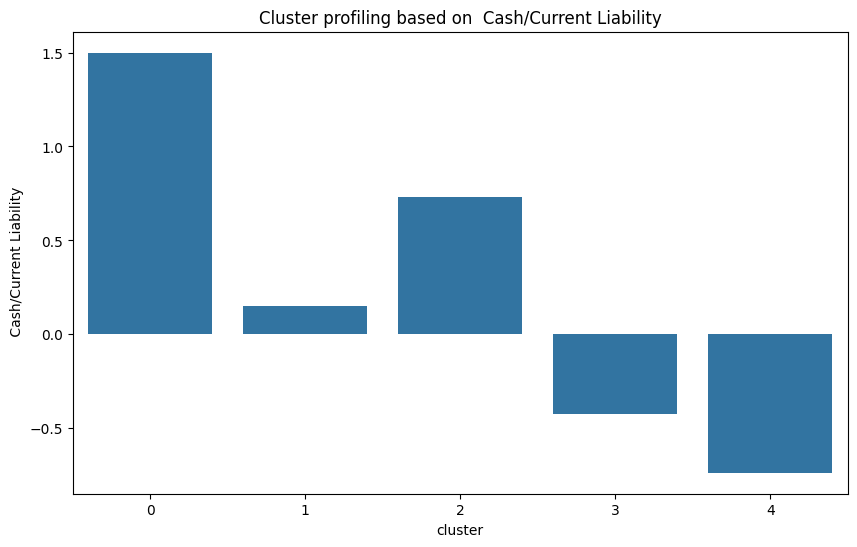

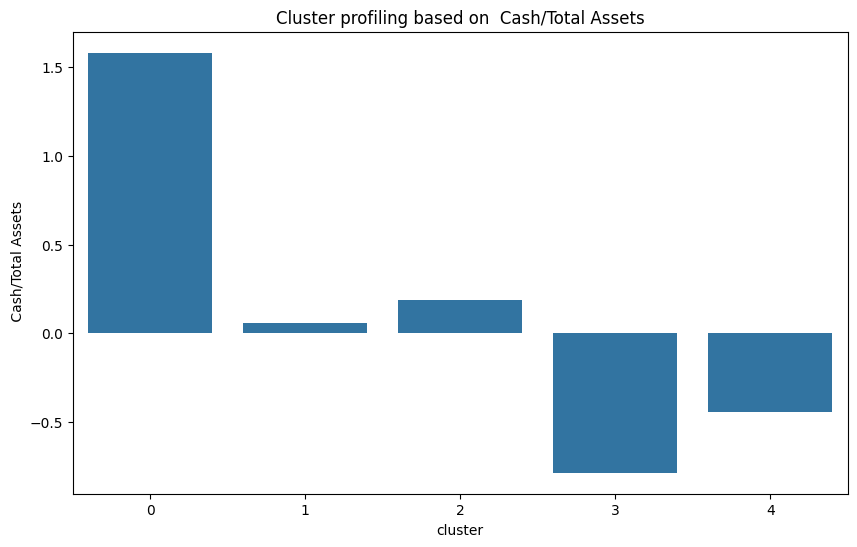

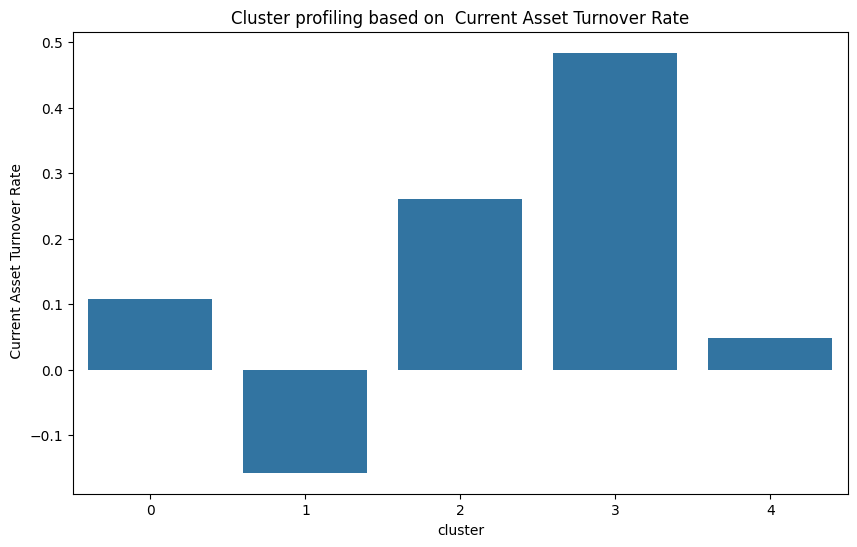

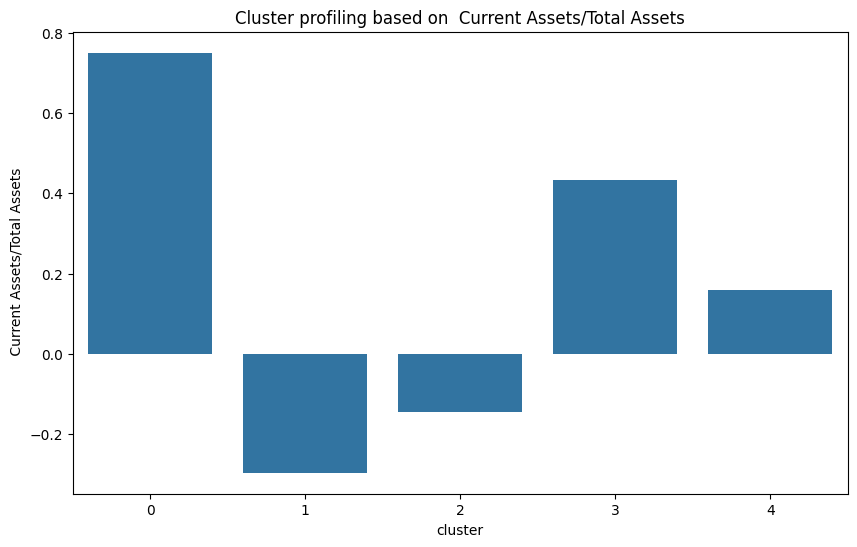

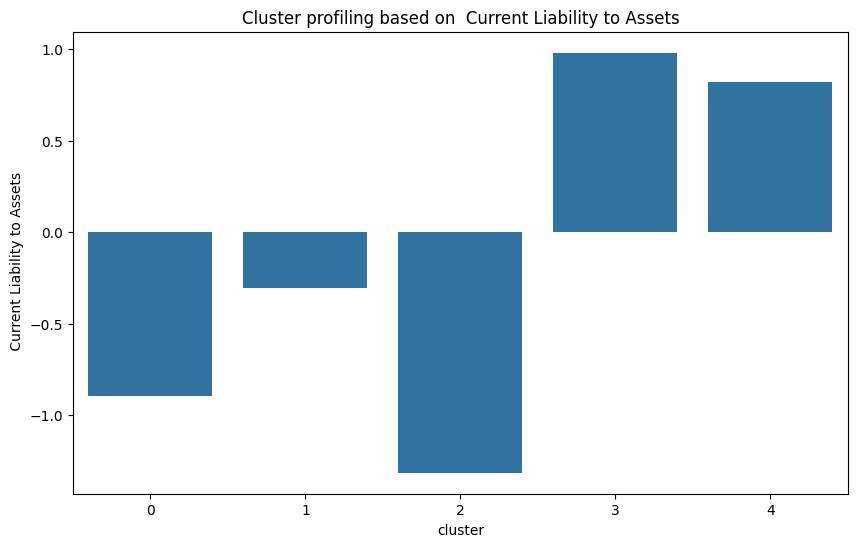

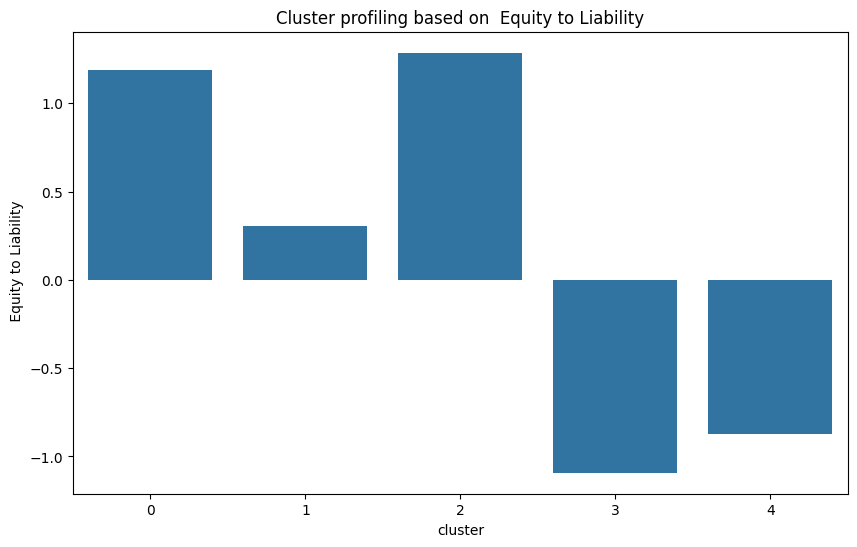

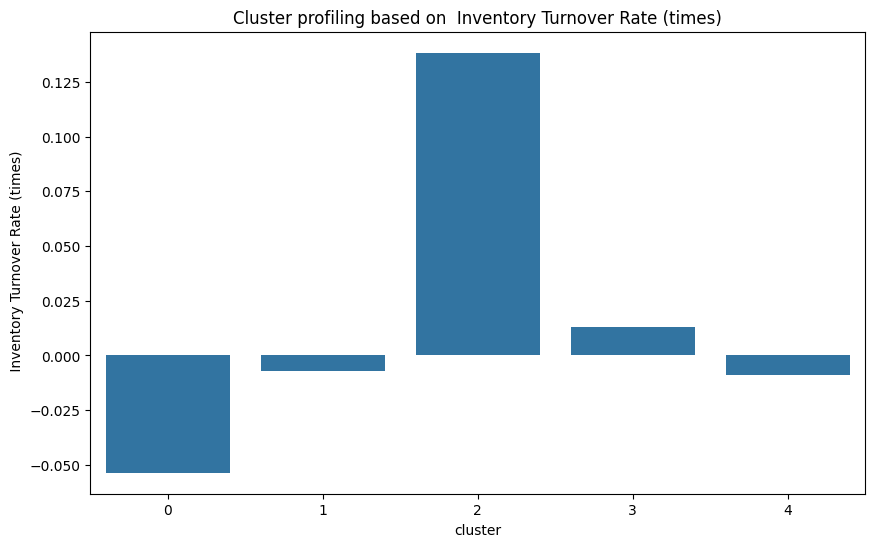

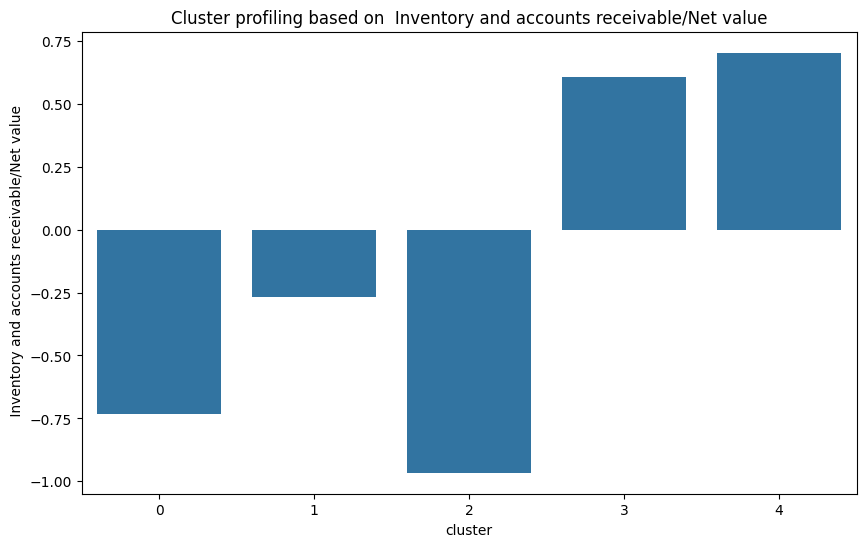

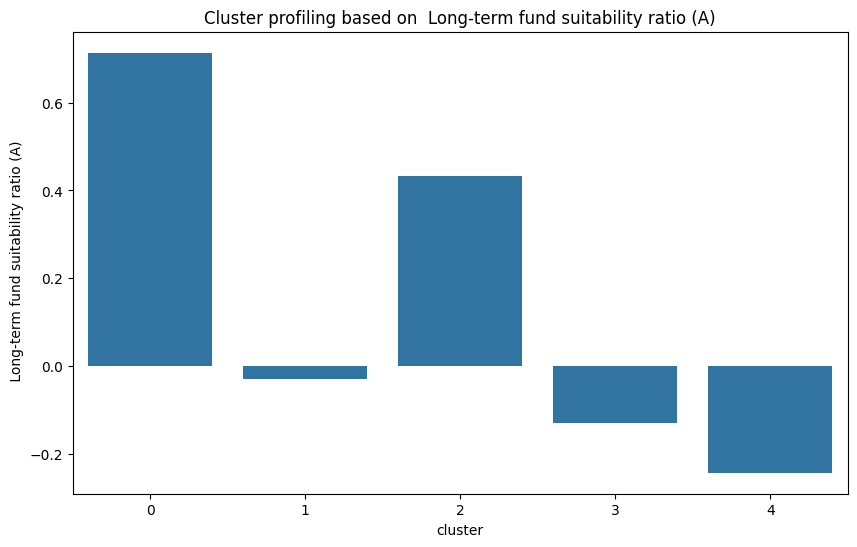

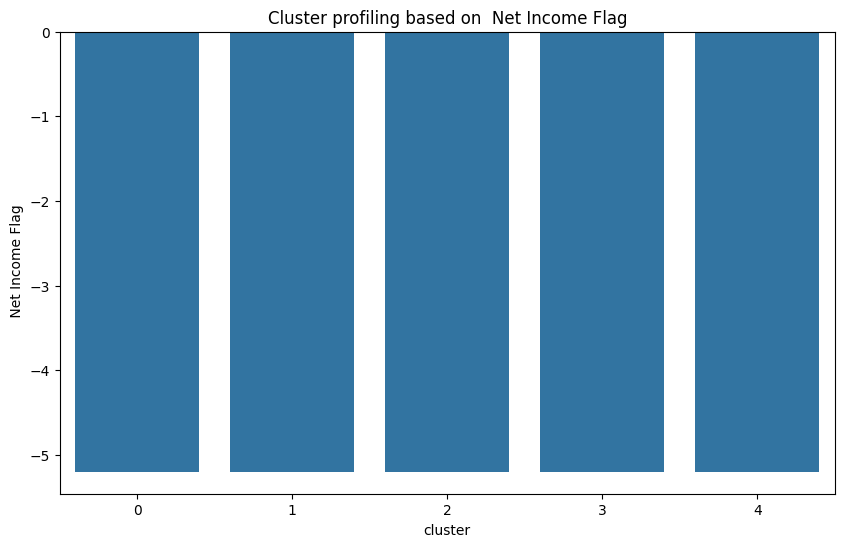

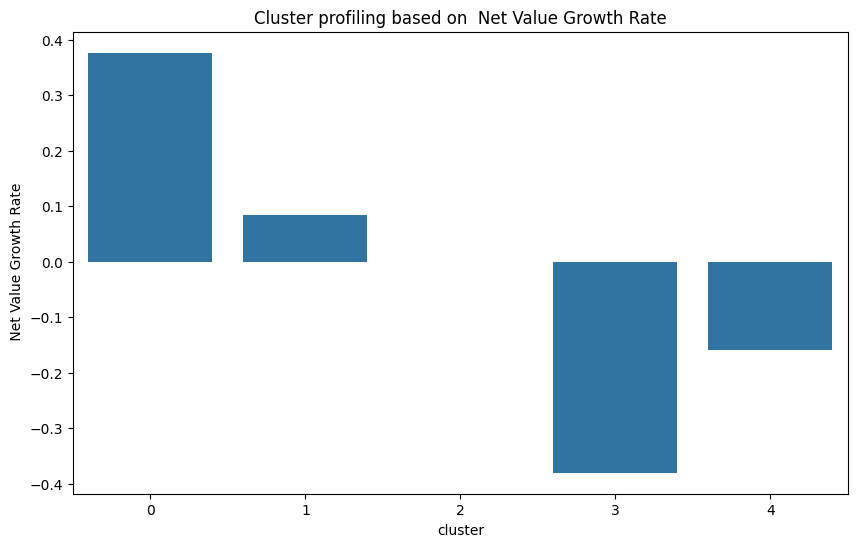

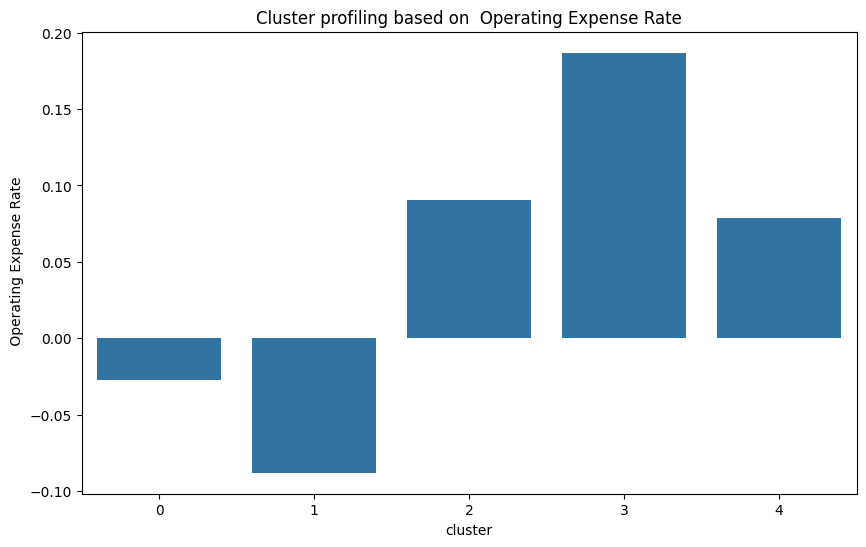

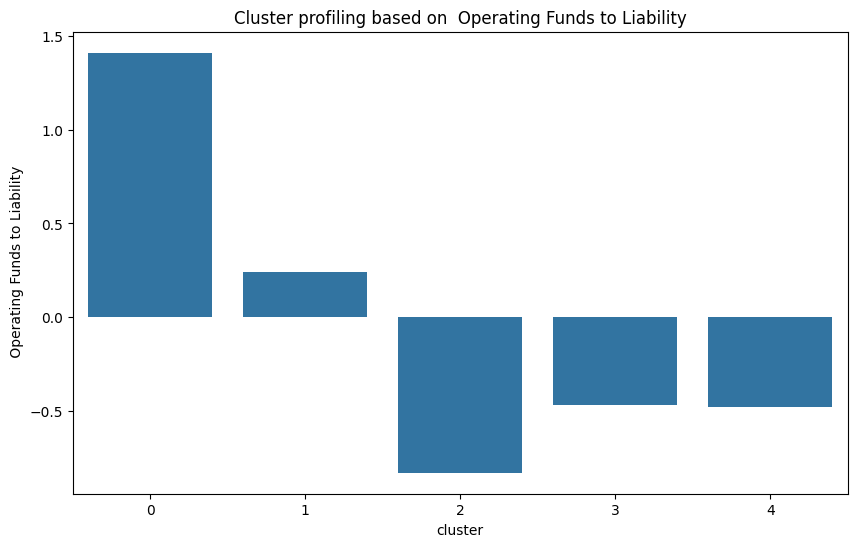

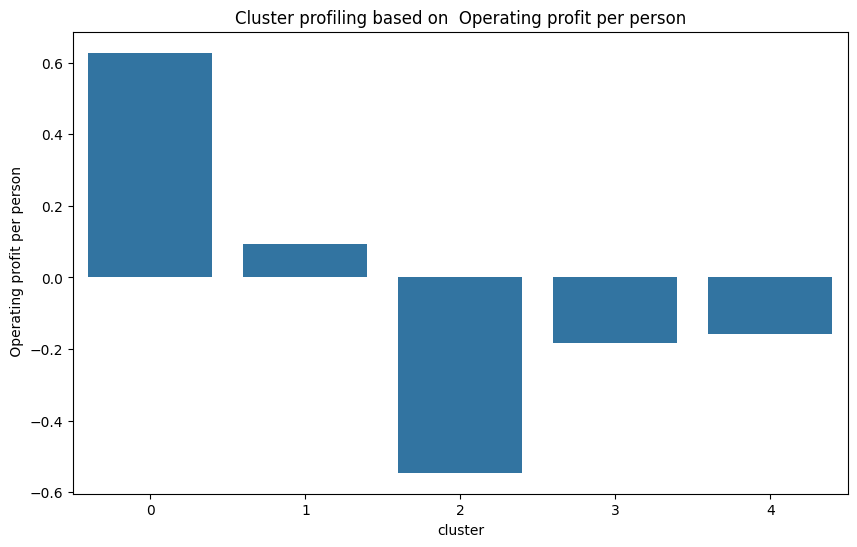

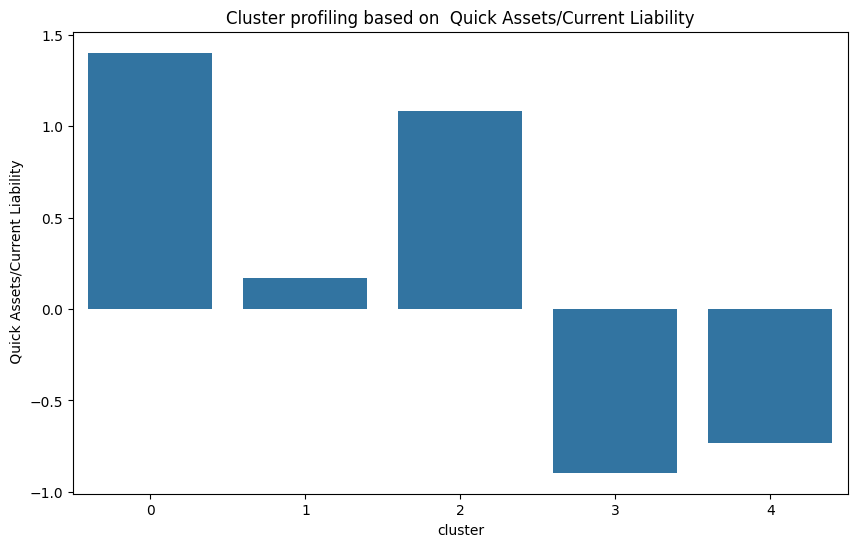

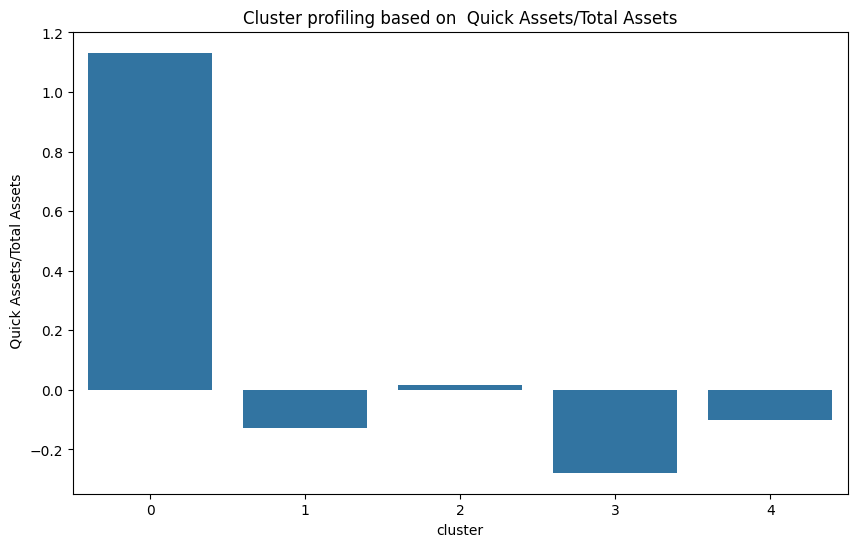

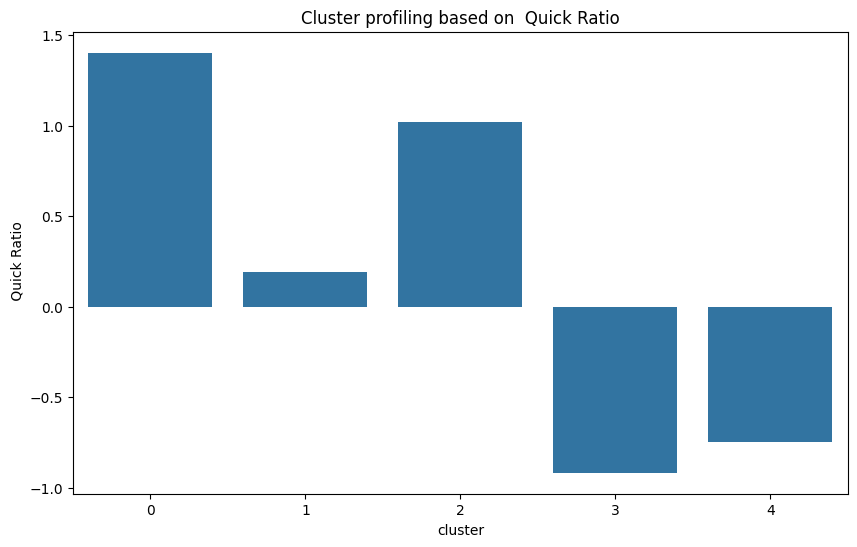

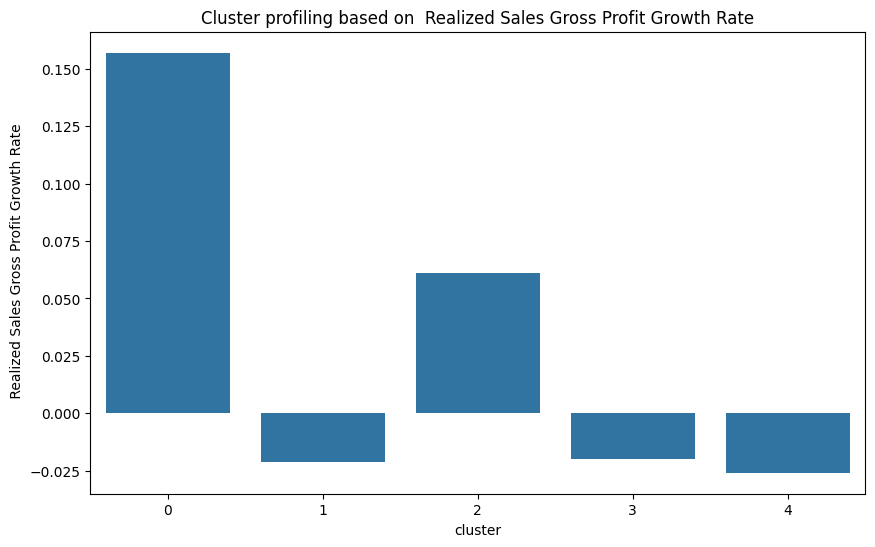

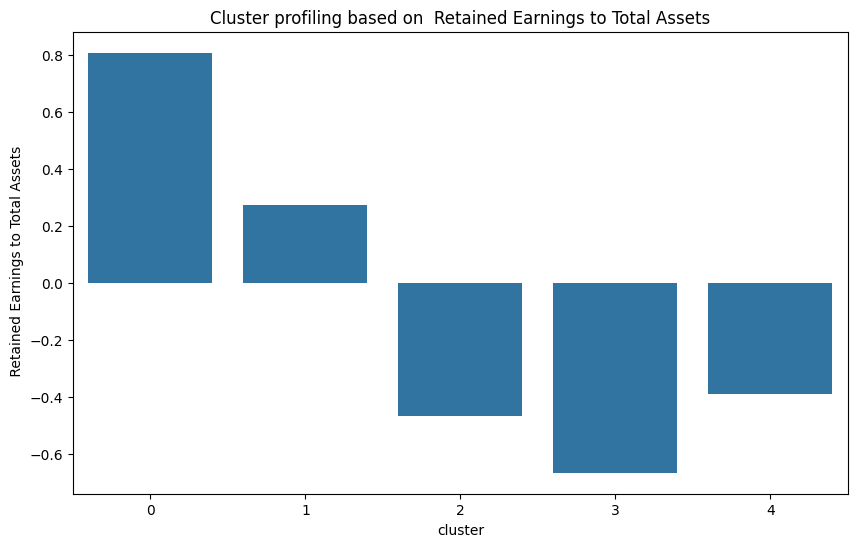

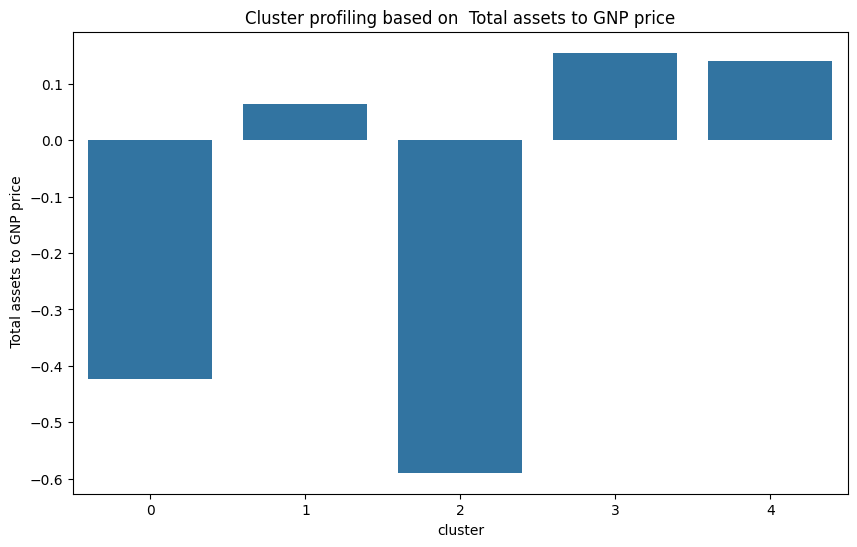

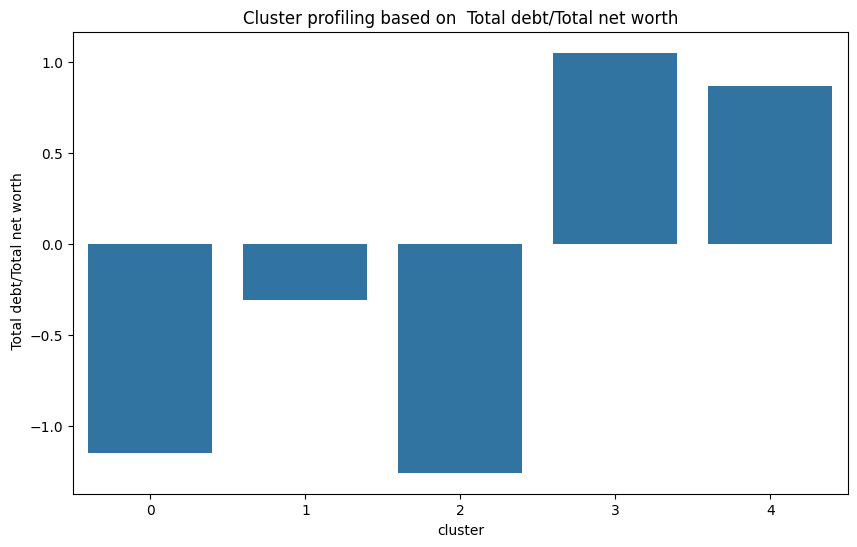

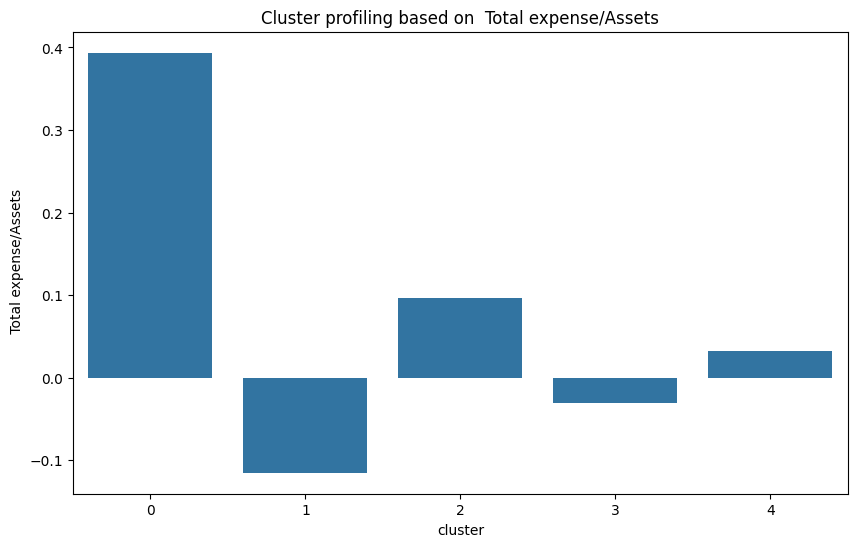

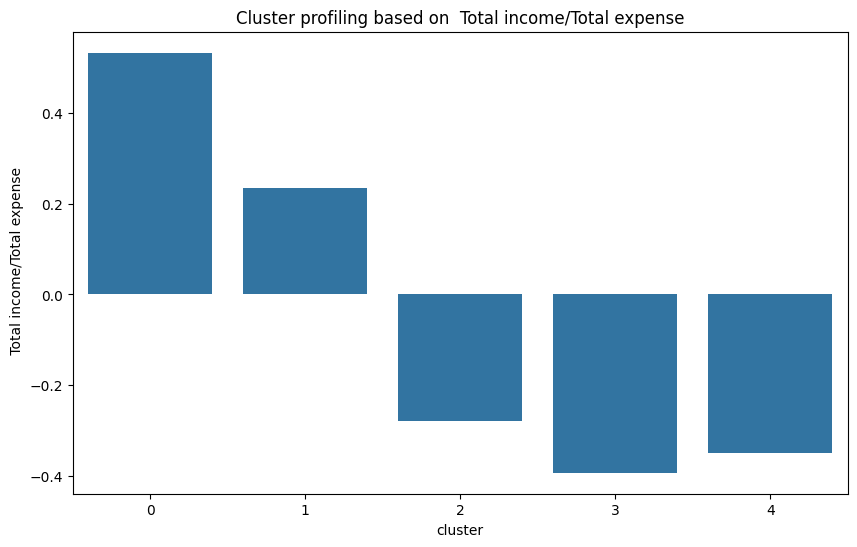

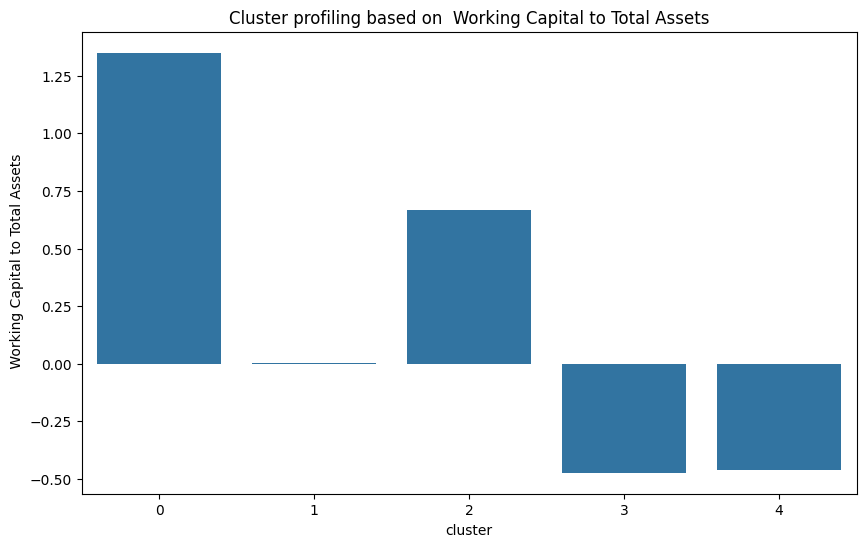

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the GMM to the scaled features
gmm = GaussianMixture(n_components=optimal_k, random_state=0)
gmm.fit(features_scaled)

# Predict the cluster labels for the scaled features
clusters = gmm.predict(features_scaled)

# Add cluster IDs to the original train_data (assumes `train_data` does not include target variable)
train_data['cluster'] = clusters

# Reduce the scaled features to two dimensions using PCA for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDf['cluster'] = clusters  # Add the cluster labels to the PCA dataframe

# Plot the PCA-reduced data with the cluster labels
plt.figure(figsize=(8, 8))
sns.scatterplot(data=principalDf, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title('Cluster Visualization using PCA')
plt.show()

# Cluster profiling on the original data (without scaling)
cluster_profiles = train_data.groupby('cluster').mean()

# Visualizing the mean values of the features for each cluster
# Selecting all features for profiling (you can also select a subset if there are too many)
features_for_profiling = train_data.columns.difference(['cluster'])

# Create bar plots for each feature's mean value across clusters
for feature in features_for_profiling:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='cluster', y=feature, data=cluster_profiles.reset_index())
    plt.title(f'Cluster profiling based on {feature}')
    plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'clusters' and 'train_data' are already defined and 'clusters' added to 'train_data'
# Cluster profiling on the original data (without scaling)
cluster_profiles = train_data.groupby('cluster').mean()

# Calculate the number of samples per cluster
cluster_counts = train_data['cluster'].value_counts().rename('count')

# Joining the counts to the cluster profiles for a comprehensive view
cluster_profiles = cluster_profiles.join(cluster_counts)

# Print the cluster profiles with the sample counts
print(cluster_profiles)

# Visualizing the mean values of the features for each cluster
# Selecting all features for profiling (you can also select a subset if there are too many)
features_for_profiling = train_data.columns.difference(['cluster'])



# Optionally, print the features' means in each cluster as a list or report
for cluster in cluster_profiles.index:
    print(f"\nCluster {cluster} Summary:")
    print(cluster_profiles.loc[cluster])
    print("\n")


          Operating Expense Rate   Cash Flow Per Share  \
cluster                                                  
0                      -0.027137              0.892501   
1                      -0.088030              0.218522   
2                       0.090282             -0.758999   
3                       0.186827             -0.403570   
4                       0.078551             -0.320443   

          Realized Sales Gross Profit Growth Rate   Net Value Growth Rate  \
cluster                                                                     
0                                        0.156926                0.376427   
1                                       -0.021281                0.083331   
2                                        0.061227               -0.000339   
3                                       -0.019731               -0.380376   
4                                       -0.025832               -0.159792   

          Cash Reinvestment %   Quick Ratio   Total d

In [16]:
train_data_updated = train_data
train_data_updated.to_csv('train_data_updated.csv')
train_data_updated

,Operating Expense Rate,Cash Flow Per Share,Realized Sales Gross Profit Growth Rate,Net Value Growth Rate,Cash Reinvestment %,Quick Ratio,Total debt/Total net worth,Long-term fund suitability ratio (A),Inventory and accounts receivable/Net value,Inventory Turnover Rate (times),...,Total expense/Assets,Current Asset Turnover Rate,Cash Turnover Rate,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Total assets to GNP price,Net Income Flag,Equity to Liability,cluster
0,1.291763,-0.574968,-1.627254,-1.054253,-0.416102,-0.384322,0.068156,-0.836116,-0.492368,-0.996796,...,-0.425792,1.222697,0.852965,0.739954,0.672620,-0.569910,0.614343,-5.199338,-0.071185,1
1,-2.286852,0.248742,0.569580,0.722709,0.098690,0.226857,0.069029,-0.329645,0.773301,-1.699538,...,-0.299494,-0.634750,0.654325,0.407732,0.391884,0.054720,0.743741,-5.199338,-0.072062,1
2,-1.898642,1.009234,0.794533,0.809529,0.697808,0.747268,0.032348,-0.142334,0.311328,-1.488469,...,-0.318944,-0.192932,-1.362621,1.213967,1.042323,0.801831,0.753271,-5.199338,-0.035299,1
3,1.182904,-2.727476,0.720634,0.422374,-2.589341,-2.086978,1.963339,0.575554,2.355100,0.288010,...,-1.117117,0.637587,0.996796,0.391608,0.194529,-2.468447,0.022819,-5.199338,-1.977934,4
4,0.941069,-0.418016,-0.752851,-1.088834,-0.705505,0.172439,0.299363,0.768474,-0.088187,0.073023,...,0.634641,1.279244,-0.014679,-1.107718,-0.984703,-0.483936,-0.469598,-5.199338,-0.302502,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,0.554081,0.342006,-1.062682,-0.875449,-0.017300,-1.558050,1.356404,-2.123688,0.663514,-0.676852,...,-0.937332,0.936442,0.006268,-0.224166,-0.212819,0.072589,0.461341,-5.199338,-1.362880,4
5803,0.242819,0.512185,-0.354526,0.879960,1.167326,0.330407,-0.615677,-0.683047,-1.113129,0.488882,...,0.634102,0.539241,-0.390405,1.222379,1.257975,0.792292,-0.796382,-5.199338,0.611827,1
5804,0.678745,0.447200,-0.922069,-1.086322,-0.423769,0.034308,0.416649,1.005075,1.338185,-0.929422,...,0.356663,1.129109,0.287990,0.271870,0.231369,0.274748,0.601701,-5.199338,-0.420481,4
5805,0.349424,1.257011,0.451866,1.469562,1.013870,1.378413,1.508370,1.032006,-0.694933,0.988180,...,2.214071,-0.265181,-0.589139,2.245036,1.364895,0.771847,-1.286062,-5.199338,-1.516700,3


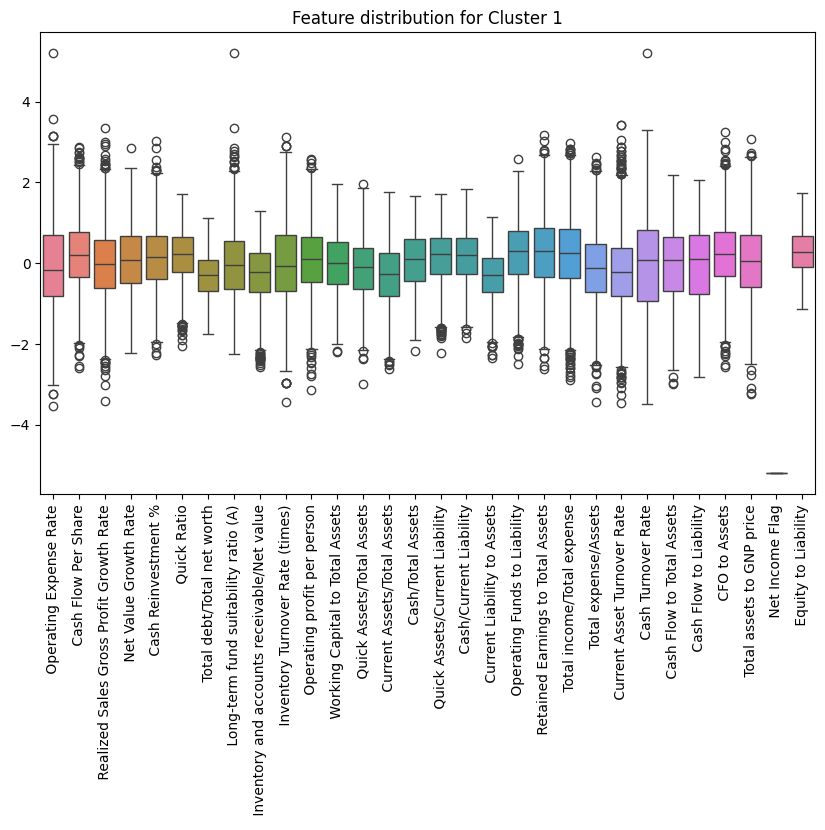

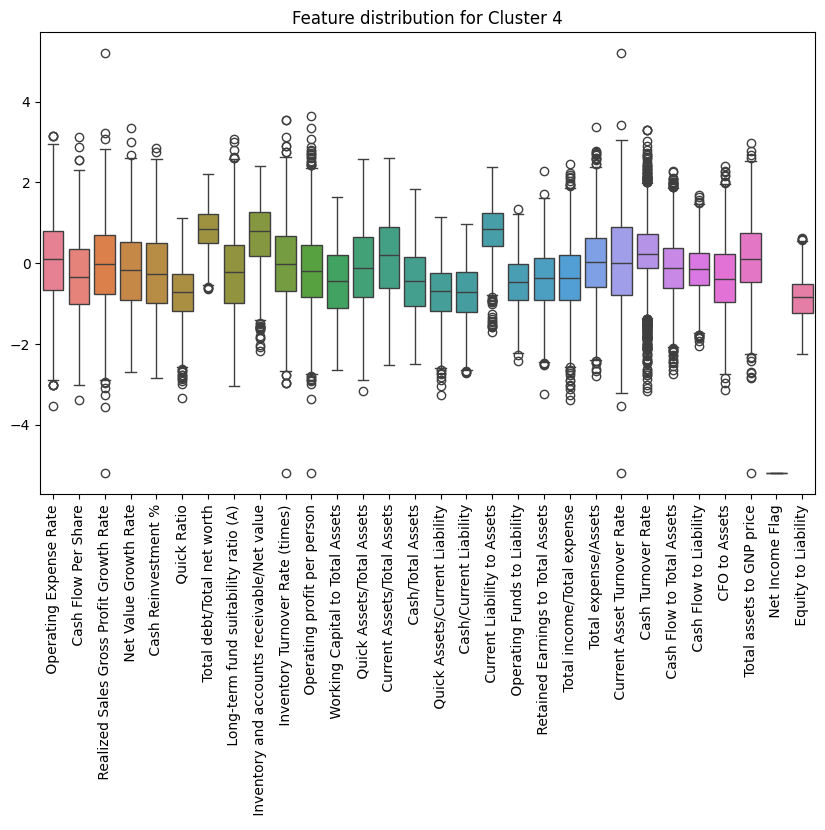

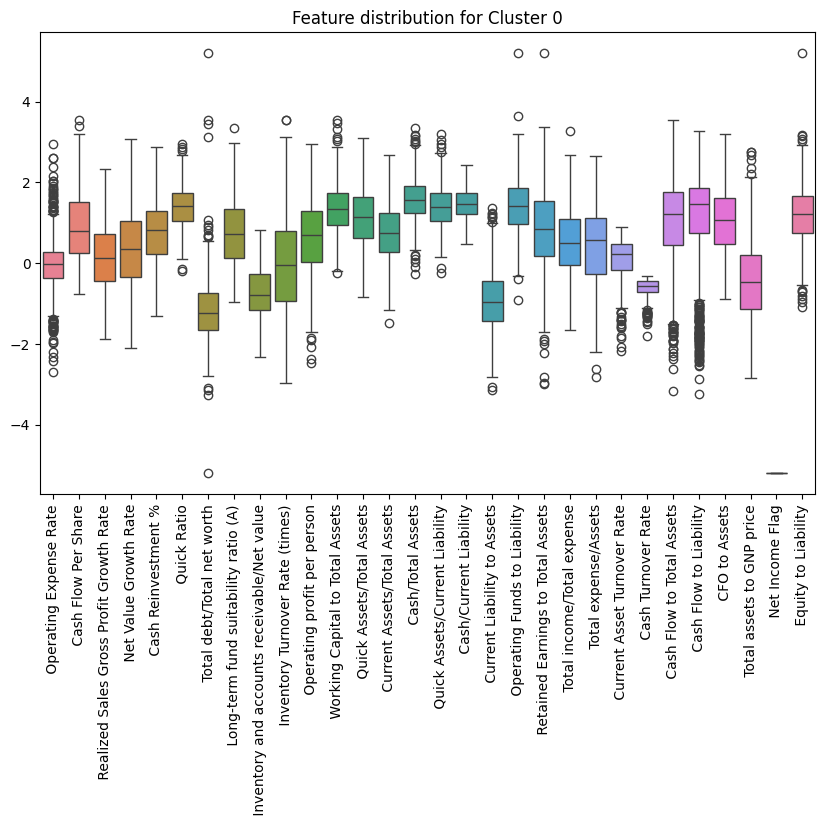

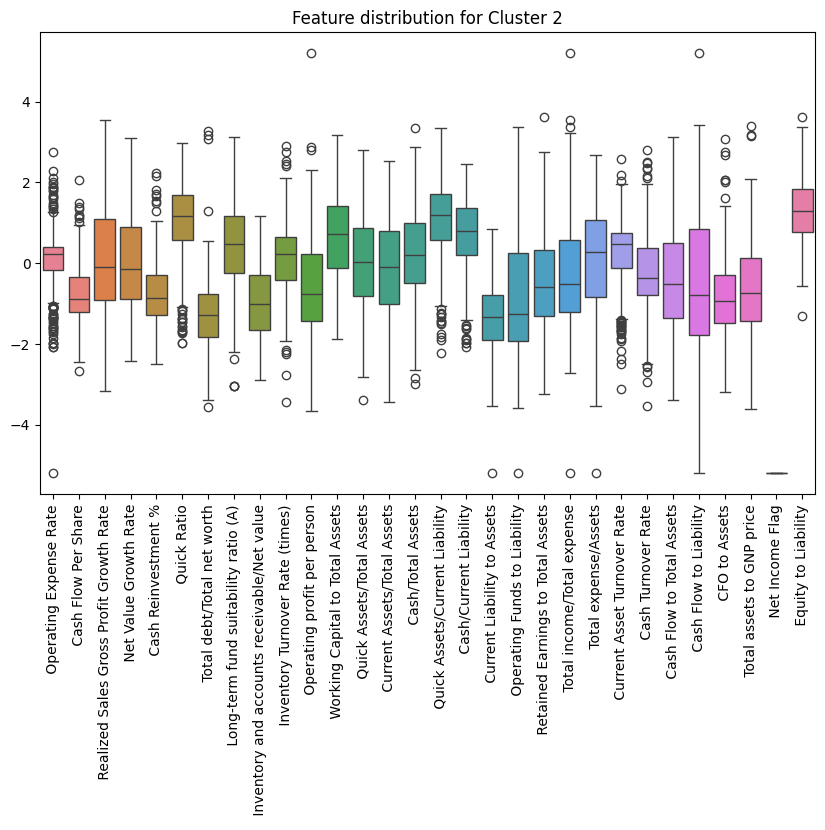

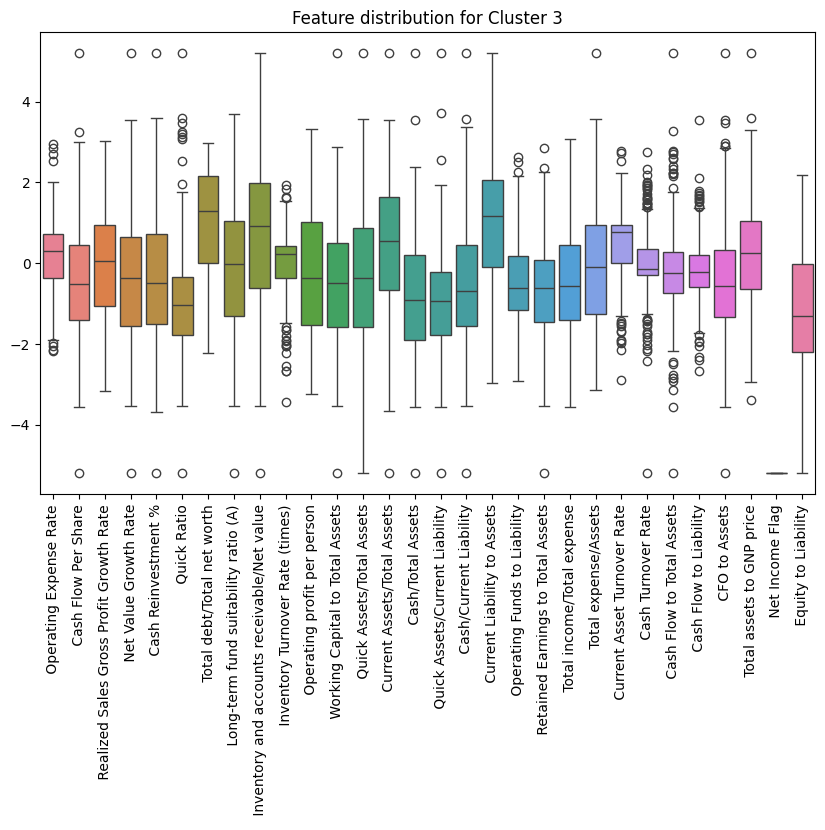

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_data' is your DataFrame and 'cluster' is the column with cluster IDs
for cluster_id in train_data['cluster'].unique():
    cluster_data = train_data[train_data['cluster'] == cluster_id]
    cluster_summary = cluster_data.describe()
    #print(f"Cluster {cluster_id} Summary Statistics:")
    #print(cluster_summary)
    
    # For visualization
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cluster_data.drop(['cluster'], axis=1))
    plt.title(f"Feature distribution for Cluster {cluster_id}")
    plt.xticks(rotation=90)
    plt.show()


In [18]:
from scipy.stats import f_oneway

# Assuming you have a list of features and a DataFrame 'train_data'
features = train_data.columns.difference(['cluster'])
for feature in features:
    statistics = f_oneway(*(train_data[train_data['cluster'] == cluster][feature].values for cluster in train_data['cluster'].unique()))
    print(f"ANOVA test for feature {feature}: F-statistic = {statistics.statistic}, p-value = {statistics.pvalue}")


ANOVA test for feature  CFO to Assets: F-statistic = 437.681901101207, p-value = 0.0
ANOVA test for feature  Cash Flow Per Share: F-statistic = 317.28559380638126, p-value = 3.069756383244247e-247
ANOVA test for feature  Cash Flow to Liability: F-statistic = 196.59522339747417, p-value = 2.5271273459091998e-158
ANOVA test for feature  Cash Flow to Total Assets: F-statistic = 159.1141512392907, p-value = 2.0994330429850647e-129
ANOVA test for feature  Cash Reinvestment %: F-statistic = 207.86387178716237, p-value = 6.817148886110964e-167
ANOVA test for feature  Cash Turnover Rate: F-statistic = 90.82638754570243, p-value = 5.200774461839185e-75
ANOVA test for feature  Cash/Current Liability: F-statistic = 1148.752821805172, p-value = 0.0
ANOVA test for feature  Cash/Total Assets: F-statistic = 722.2795439692258, p-value = 0.0
ANOVA test for feature  Current Asset Turnover Rate: F-statistic = 46.21574046657717, p-value = 2.759172058617934e-38
ANOVA test for feature  Current Assets/Total 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3903: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

X = train_data.drop(['cluster'], axis=1)  # Features
y = train_data['cluster']  # Labels for clusters

# Random Forest for feature importance
forest = RandomForestClassifier()
forest.fit(X, y)

# Get feature importances
importances = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances:\n", importances)

Feature importances:
 Equity to Liability                            0.128274
Total debt/Total net worth                     0.115538
Current Liability to Assets                    0.082203
Quick Ratio                                    0.077854
Cash/Total Assets                              0.073818
Cash/Current Liability                         0.072917
Quick Assets/Current Liability                 0.056917
Inventory and accounts receivable/Net value    0.047917
Operating Funds to Liability                   0.034895
Current Assets/Total Assets                    0.030294
Working Capital to Total Assets                0.027089
Quick Assets/Total Assets                      0.025680
Cash Flow Per Share                            0.023091
CFO to Assets                                  0.022075
Cash Reinvestment %                            0.018253
Retained Earnings to Total Assets              0.017389
Cash Flow to Liability                         0.016882
Cash Turnover Rate        

In [20]:
from sklearn.inspection import permutation_importance

# Using Random Forest as an example
result = permutation_importance(forest, X, y, n_repeats=10)
perm_importances = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)
print("Permutation importances:\n", perm_importances)


Permutation importances:
 Equity to Liability                            0.037059
Total debt/Total net worth                     0.032685
Quick Ratio                                    0.029706
Cash/Total Assets                              0.026038
Current Liability to Assets                    0.025211
Cash/Current Liability                         0.020114
Current Assets/Total Assets                    0.004942
Operating Funds to Liability                   0.004753
Quick Assets/Current Liability                 0.003909
Inventory and accounts receivable/Net value    0.003857
Quick Assets/Total Assets                      0.002394
Retained Earnings to Total Assets              0.001877
Working Capital to Total Assets                0.001154
Total expense/Assets                           0.001119
Cash Flow Per Share                            0.000827
Cash Turnover Rate                             0.000758
Operating profit per person                    0.000654
Cash Flow to Liability

In [21]:
import pandas as pd 
train_data_original = pd.read_csv("train_data.csv")
# Add the 'Bankrupt?' column from the original dataframe to the updated dataframe using indices
train_data_updated_with_bankrupt = train_data_updated.merge(train_data_original[['Index', 'Bankrupt?']], left_index=True, right_index=True, how='left')
train_data_updated_with_bankrupt.to_csv("train_data_updated_with_bankrupt.csv")

